In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

# Implement the Euler-Maruyama solver

In [4]:
# An SDE solver

def EM(X, t, dt, a, b, dW=None):
    # Euler-Maruyama method, with drift a(X, t) and diffusion b(X, t)
    # Unless provided, generate random dW, Gaussian with mean=0 and variance=dt
    # and the correct number of elements
    if dW is None:
        dW = np.random.normal(loc=0, scale=np.sqrt(dt), size=X.shape)
    # Calculate and return next value
    return X + a(X, t)*dt + b(X, t)*dW

def solve_SDE(X0, tmax, dt, a, b, solver, W=None):
    # A simple solve function (assumes dt evenly divides tmax)
    # Calculate number of timsteps (including 0 and tmax)
    Nt = int(tmax/dt) + 1
    # If X0 is not an array, turn it into a 1-element array
    if not isinstance(X0, np.ndarray):
        X0 = np.array([X0])
    # Arrays to track solution
    X = np.zeros((Nt, *X0.shape))
    X[0,:] = X0
    t = 0
    for n in range(1, Nt):
        # Call solver, with pre-computed W if available
        if W is None:
            X[n,:] = solver(X[n-1,:], t, dt, a, b)
        else:
            # Obtain increment from pre-computed Wt
            dW = W[n] - W[n-1]
            X[n,:] = solver(X[n-1,:], t, dt, a, b, dW=dW)
        t += dt
    return X

# Solve the simplest SDE

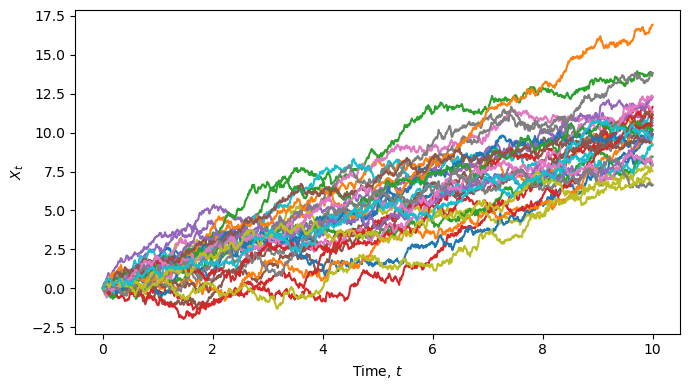

In [6]:
a_ = 1
b_ = 1

# Implementing a and b as functions, even though they are constant here,
# for consistency with the general solver
def a(X, t):
    return a_

def b(X, t):
    return b_

# Several initial values leads to several solutions
Np = 30
X0 = np.zeros(Np)
# Integration time
tmax = 10
# timestep
dt = 0.01

X = solve_SDE(X0, tmax, dt, a, b, EM)

t = dt*np.arange(len(X))

# Plot the solution
fig = plt.figure(figsize = (7, 4))
plt.plot(t, X)
plt.xlabel('Time, $t$')
plt.ylabel('$X_t$')
plt.tight_layout()

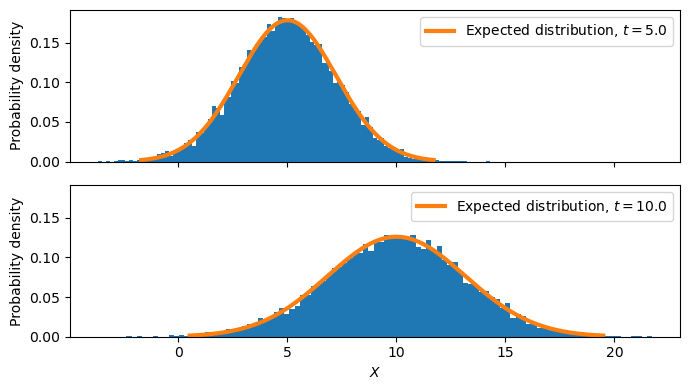

In [18]:
a_ = 1
b_ = 1
X0_ = 0

# Implementing a and b as functions, even though they are constant here,
# for consistency with the general solver
def a(X, t):
    return a_

def b(X, t):
    return b_

# Several initial values leads to several solutions
Np = 10000
X0 = X0_ * np.ones(Np)
# Integration time
Tmax = 10
# timestep
dt = 0.01

X = solve_SDE(X0, Tmax, dt, a, b, EM)


# Plot the distribution for some time
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize = (7, 4))

for a, it in zip(ax, [500, 1000]):
    # Plot histogram for time t = it*dt
    a.hist(X[it,:], bins=100, density=True)

    # Plot Gaussian distribution
    mu = X0_ + a_*dt*it
    sigma = b_*np.sqrt(dt*it)
    x = np.linspace(mu-3*sigma, mu+3*sigma, 1000)
    a.plot(x, np.exp(-0.5*(x-mu)**2/sigma**2)/(np.sqrt(2*np.pi)*sigma), lw=3, label=f'Expected distribution, $t={dt*it}$')
    a.legend()

ax[1].set_xlabel('$X$')
ax[0].set_ylabel('Probability density')
ax[1].set_ylabel('Probability density')
plt.tight_layout()

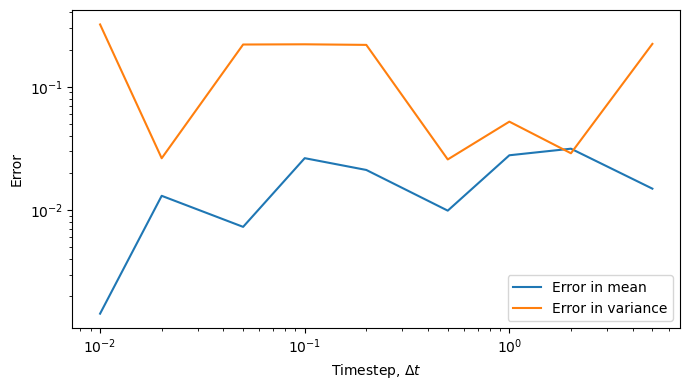

In [24]:
a_ = 1
b_ = 1
X0_ = 0

# Implementing a and b as functions, even though they are constant here,
# for consistency with the general solver
def a(X, t):
    return a_

def b(X, t):
    return b_

# Several initial values leads to several solutions
Np = 10000
X0 = X0_ * np.ones(Np)
# Integration time
Tmax = 10
# timestep

# Solve for different timesteps, and calculate the mean and variance
timesteps = np.array([0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5])
mean_list = np.zeros_like(timesteps)
variance_list = np.zeros_like(timesteps)

for i, dt in enumerate(timesteps):
    X = solve_SDE(X0, Tmax, dt, a, b, EM)
    mean_list[i] = np.mean(X[-1, :])
    variance_list[i] = np.var(X[-1, :])

# Plot the difference between the observed and expected mean and variance
mean = X0_ + a_*Tmax
variance = b_**2 * Tmax

mean_error = np.abs(mean_list - mean)
variance_error = np.abs(variance_list - variance)

fig = plt.figure(figsize=(7,4))
plt.plot(timesteps, mean_error, label='Error in mean')
plt.plot(timesteps, variance_error, label='Error in variance')
plt.xlabel('Timestep, $\Delta t$')
plt.ylabel('Error')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()

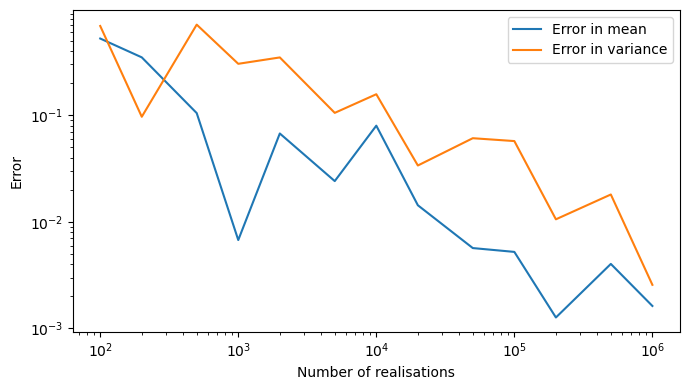

In [35]:
a_ = 1
b_ = 1
X0_ = 0

# Implementing a and b as functions, even though they are constant here,
# for consistency with the general solver
def a(X, t):
    return a_

def b(X, t):
    return b_

# Integration time
Tmax = 10
# timestep
dt = 1

# Solve for different number of realisations, and calculate the mean and variance
Np_list = np.array([100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000, 500000, 1000000])
mean_list = np.zeros(len(Np_list))
variance_list = np.zeros(len(Np_list))

for i, Np in enumerate(Np_list):
    # Several initial values leads to several solutions
    X0 = X0_ * np.ones(Np)
    X = solve_SDE(X0, Tmax, dt, a, b, EM)
    mean_list[i] = np.mean(X[-1, :])
    variance_list[i] = np.var(X[-1, :])

# Plot the difference between the observed and expected mean and variance
mean = X0_ + a_*Tmax
variance = b_**2 * Tmax

mean_error = np.abs(mean_list - mean)
variance_error = np.abs(variance_list - variance)

fig = plt.figure(figsize=(7,4))
plt.plot(Np_list, mean_error, label='Error in mean')
plt.plot(Np_list, variance_error, label='Error in variance')
plt.xlabel('Number of realisations')
plt.ylabel('Error')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()

# Solve the slightly more complicated SDE

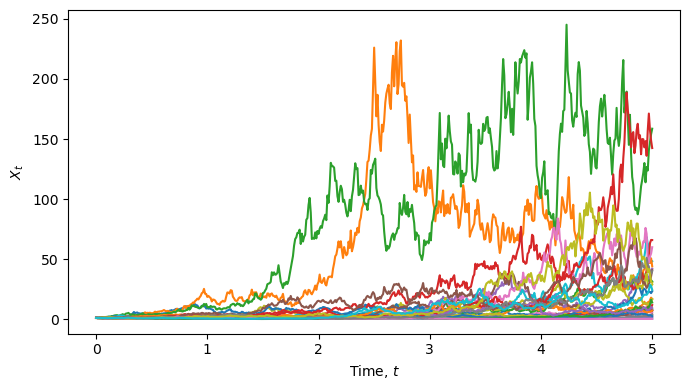

In [38]:
a_ = 1
b_ = 1
X0_ = 1

def a(X, t):
    return a_ * X

def b(X, t):
    return b_ * X

# Several initial values leads to several solutions
Np = 30
X0 = X0_*np.ones(Np)
# Integration time
tmax = 5
# timestep
dt = 0.01

X = solve_SDE(X0, tmax, dt, a, b, EM)

t = dt*np.arange(len(X))

# Plot the solution
fig = plt.figure(figsize = (7, 4))
plt.plot(t, X)
plt.xlabel('Time, $t$')
plt.ylabel('$X_t$')
plt.tight_layout()

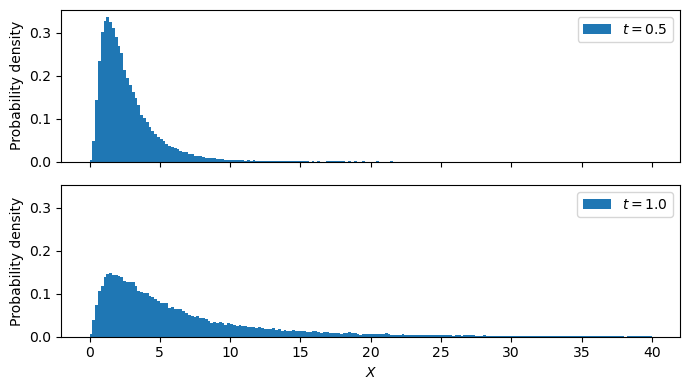

In [55]:
a_ = 2
b_ = 1
X0_ = 1

def a(X, t):
    return a_ * X

def b(X, t):
    return b_ * X

# Several initial values leads to several solutions
Np = 50000
X0 = X0_ * np.ones(Np)
# Integration time
Tmax = 1
# timestep
dt = 0.01

X = solve_SDE(X0, Tmax, dt, a, b, EM)


# Plot the distribution for some time
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize = (7, 4))

for a, it in zip(ax, [50, 100]):
    # Plot histogram for time t = it*dt
    bins = np.linspace(0, 40, 201)
    a.hist(X[it,:], bins=bins, density=True, label=f'$t={it*dt}$')
    a.legend()

ax[1].set_xlabel('$X$')
ax[0].set_ylabel('Probability density')
ax[1].set_ylabel('Probability density')
plt.tight_layout()

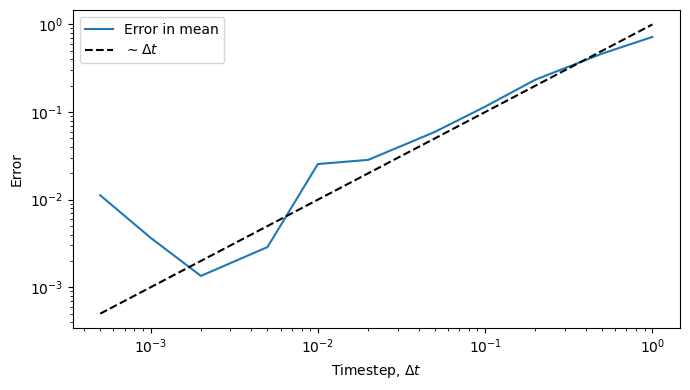

In [65]:
a_ = 1
b_ = 1
X0_ = 1

# Implementing a and b as functions, even though they are constant here,
# for consistency with the general solver
def a(X, t):
    return a_ * X

def b(X, t):
    return b_ * X

# Several initial values leads to several solutions
Np = 100000
X0 = X0_ * np.ones(Np)
# Integration time
Tmax = 1
# timestep

# Solve for different timesteps, and calculate the mean and variance
timesteps = np.array([0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1])
mean_list = np.zeros_like(timesteps)

for i, dt in enumerate(timesteps):
    X = solve_SDE(X0, Tmax, dt, a, b, EM)
    mean_list[i] = np.mean(X[-1, :])

# Plot the difference between the observed and expected mean
mean = X0_*np.exp(a_*Tmax)

mean_error = np.abs(mean_list - mean)

fig = plt.figure(figsize=(7,4))
plt.plot(timesteps, mean_error, label='Error in mean')
plt.plot(timesteps, timesteps, '--', c='k', label=('$\sim \Delta t$'))
plt.xlabel('Timestep, $\Delta t$')
plt.ylabel('Error')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()

# References

Maruyama, G., Continuous Markov processes and stochastic equations. _Rend. Circ. Mat. Palermo_ 4, 48–90 (1955). https://doi.org/10.1007/BF02846028